In [1]:
#import graphviz
import librosa
import librosa.display
import numpy as np
import pickle
import glob
import cv2
import matplotlib.pyplot as plt

import PIL
from PIL import Image

# %matplotlib inline

In [2]:
with open('../data/temp/specURLs.pkl', 'rb') as f:
    df = pickle.load(f)
    
print(df[0])

('01_10003_1-04_Shri_Visvanatham', '01_10003_1-04_Shri_Visvanatham_H8', '01_10003_1-04_Shri_Visvanatham_mel', '01_10003_1-04_Shri_Visvanatham_P8', '01_10003_1-04_Shri_Visvanatham_stft', 3)
01_10003_1-04_Shri_Visvanatham_H8


In [3]:
# Read in spectrograms in color along will labels 

harmonics = []
mels = []
percussives =[]
stfts = []

labels = []

for i in range(len(df)):
    harmonics.append(cv2.imread('../data/img/harmonic/'+ df[i][1] + '.png', 0))
    mels.append(cv2.imread('../data/img/melspec/' + df[i][2] + '.png', 0))
    percussives.append(cv2.imread('../data/img/percussive/' + df[i][3] + '.png', 0))
    stfts.append(cv2.imread('../data/img/stft/' + df[i][4] + '.png', 0))

    labels.append(df[i][5])
    
harmonics = np.array(harmonics)
mels = np.array(mels)
percussives = np.array(percussives)
stfts = np.array(stfts)
labels = np.array(labels)

print(harmonics.shape)
print(mels.shape)
print(percussives.shape)
print(stfts.shape)

print(labels.shape)

(118, 400, 1600)
(118, 400, 1600)
(118, 400, 1600)
(118, 400, 1600)
(118,)


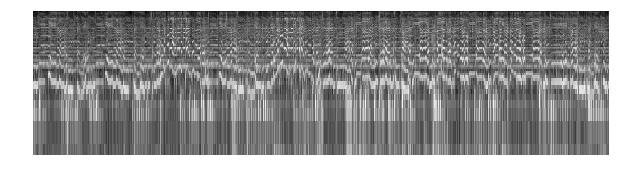

(400, 1600)


In [4]:
# Example Grayscale Melspec 

fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.axis('off')
# plt.imshow(cv2.cvtColor(mels[0], cv2.COLOR_BGR2RGB))
plt.imshow(mels[0], cmap ='gray')
plt.savefig('../data/temp/grayscaleMel.png', dpi=200)
plt.show()

print(mels[0].shape)

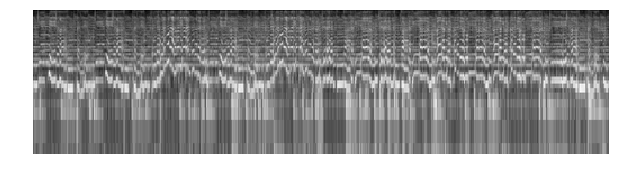

In [8]:
# Resize a single melspec 
im = Image.fromarray(mels[0])
im = im.resize([512, 128], PIL.Image.ANTIALIAS)
im = np.array(im)
print(im.shape)

# Print and Save Resized melspec
fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

# Reshaped 
plt.axis('off')
plt.imshow(im, cmap='gray')
plt.savefig('../data/temp/resizedGrayscaleMel.png', dpi=200)
plt.show()

(128, 512)


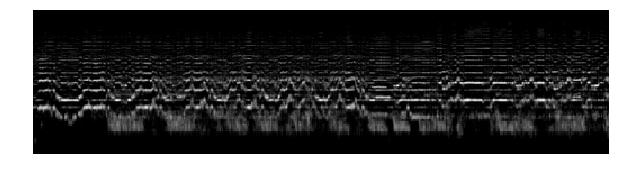

In [9]:
# Resize and save harmonics 
fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

for i in range(len(harmonics)):
    # Resize a single melspec 
    im = Image.fromarray(harmonics[i])
    im = im.resize([512, 128], PIL.Image.ANTIALIAS)
    im = np.array(im)

    # Reshaped 
    plt.axis('off')
    plt.imshow(im, cmap='gray')
    plt.savefig('../data/img/grayscale/harmonic/' + df[i][1] + '.png', dpi=200)

(128, 512)


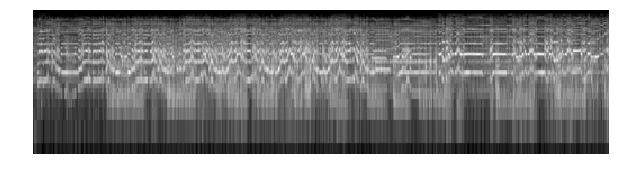

In [11]:
# Resize and save mels
fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

for i in range(len(mels)):
    # Resize a single melspec 
    im = Image.fromarray(mels[i])
    im = im.resize([512, 128], PIL.Image.ANTIALIAS)
    im = np.array(im)

    # Reshaped 
    plt.axis('off')
    plt.imshow(im, cmap='gray')
    plt.savefig('../data/img/grayscale/melspec/' + df[i][2] + '.png', dpi=200)
print(im.shape)

(128, 512)


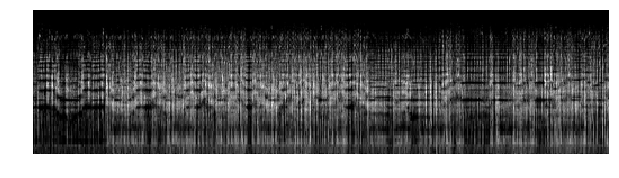

In [13]:
# Resize and save percussives 
fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

for i in range(len(percussives)):
    # Resize a single melspec 
    im = Image.fromarray(percussives[i])
    im = im.resize([512, 128], PIL.Image.ANTIALIAS)
    im = np.array(im)

    # Reshaped 
    plt.axis('off')
    plt.imshow(im, cmap='gray')
    plt.savefig('../data/img/grayscale/percussive/' + df[i][3] + '.png', dpi=200)

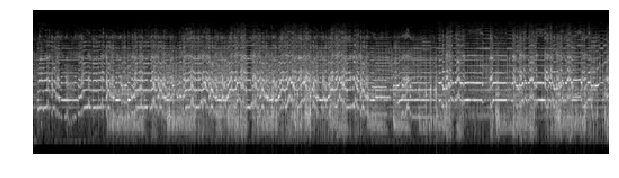

In [15]:
# Resize and save stfts 
fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

for i in range(len(stfts)):
    # Resize a single melspec 
    im = Image.fromarray(stfts[i])
    im = im.resize([512, 128], PIL.Image.ANTIALIAS)
    im = np.array(im)

    # Reshaped 
    plt.axis('off')
    plt.imshow(im, cmap='gray')
    plt.savefig('../data/img/grayscale/stft/' + df[i][4] + '.png', dpi=200)

In [ ]:
meter = []
for song in songs:
    with open('../../../annotations/meter/' + song + '.meter', 'r') as file:
        meter.append(file.readline())

# Encode song meter (taala) as an integer 
le = LabelEncoder()
meter_enc = le.fit_transform(meter)

print(meter[:5], meter_enc[:5])

In [ ]:
# Pickle resized grayscale mels with labels 
df = []
for i, song in enumerate(songs):
    df.append((song, harmonics[i], mels[i], percussives[i], stfts[i], meter_enc[i]))
    
with open('../../temp/specURLs.pkl', 'wb') as f:
    pickle.dump(df, f)